In [20]:
import pandas as pd

# Загрузка данных из файлов
behavior_data = pd.read_csv('PECOM_╨Ь╨д╨в╨Ш_TASK2_DS_behavior.csv', sep=';', encoding='utf-8')
behaviorII_data = pd.read_csv('PECOM_╨Ь╨д╨в╨Ш_TASK2_DS_behaviorII.csv', sep=';', encoding='utf-8')
feedback_data = pd.read_csv('PECOM_╨Ь╨д╨в╨Ш_TASK2_DS_feedback.csv',sep=';', encoding='utf-8')

# Вывод первых строк данных для ознакомления
behavior_data_head = behavior_data.head()
behaviorII_data_head = behaviorII_data.head()
feedback_data_head = feedback_data.head()

# Шаг 1: Исследование данных

In [21]:
behavior_data_head


,UID,UnitType,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight
0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Отправляет из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.0,0.08,4.0
1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Отправляет из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.0,0.30,4.0
2,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Отправляет получателям в,Москва Восток(МВ),2023-02-15,2023-07-26,2,400.0,0.19,4.0
3,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Получает из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.0,0.08,4.0
4,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Получает из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.0,0.30,4.0


In [22]:
behaviorII_data_head

,UID,UnitType,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight
0,58A64968-ED75-4387-921B-2DE7C67F9570,Юридическое лицо,460600.0,Отправляет из,Санкт-Петербург(СП),2024-02-15,2024-02-15,1,3000000.00,0.77,120.0
1,58A64968-ED75-4387-921B-2DE7C67F9570,Юридическое лицо,460600.0,Отправляет получателям в,Самара(СМ),2024-02-15,2024-02-15,1,3000000.00,0.77,120.0
2,58A64968-ED75-4387-921B-2DE7C67F9570,Юридическое лицо,460600.0,Получает из,Санкт-Петербург(СП),2024-02-15,2024-02-15,1,3000000.00,0.77,120.0
3,58A64968-ED75-4387-921B-2DE7C67F9570,Юридическое лицо,460600.0,Получает в,Самара(СМ),2024-02-15,2024-02-15,1,3000000.00,0.77,120.0
4,58A64968-ED75-4387-921B-2DE7C67F9570,Юридическое лицо,460600.0,Платит за услуги,Организация страхования груза,2024-02-16,2024-03-11,2,22.49,NaN,NaN


In [23]:
feedback_data_head

,UID,nClick,nOpen,nSend
0,15A56DE8-6D68-4966-820D-3893C7F0183F,0,3,0
1,0DBDACA7-ED99-447A-AF41-0032C63BA003,0,6,0
2,0355FE1A-045F-4F17-A4BB-18F176B98E9A,0,1,0
3,E8587D0E-4F32-4BD3-9889-281A5CA2EFEB,0,2,0
4,3B01032D-60A7-40A9-9BAD-377D07CD8D31,0,2,0


# Шаг 2: Предобработка данных
* Объединение данных: Мы можем объединить данные из файлов PECOM_╨Ь╨д╨в╨Ш_TASK2_DS_behavior.csv и PECOM_╨Ь╨д╨в╨Ш_TASK2_DS_behaviorII.csv на основе поля UID.
* Обработка пропущенных значений: Проверим наличие пропущенных значений и обработаем их.
* Преобразование категориальных признаков в числовые: Категориальные признаки, такие как UnitType и OKVED, нужно будет закодировать.
* Масштабирование признаков: Признаки, такие как Amount, Volume и Weight, можно масштабировать для улучшения производительности модели.

In [24]:
# Объединение данных по UID
combined_behavior_data = pd.concat([behavior_data, behaviorII_data])

# Проверка наличия пропущенных значений
missing_values_behavior = combined_behavior_data.isnull().sum()

# Преобразование типов данных
combined_behavior_data['BeginDate'] = pd.to_datetime(combined_behavior_data['BeginDate'])
combined_behavior_data['EndDate'] = pd.to_datetime(combined_behavior_data['EndDate'])
combined_behavior_data[['nCount', 'Amount', 'Volume', 'Weight']] = combined_behavior_data[['nCount', 'Amount', 'Volume', 'Weight']].apply(pd.to_numeric, errors='coerce')

# Заменим "NULL" на NaN в feedback_data
feedback_data.replace("NULL", np.nan, inplace=True)
feedback_data[['nClick', 'nOpen', 'nSend']] = feedback_data[['nClick', 'nOpen', 'nSend']].apply(pd.to_numeric, errors='coerce')

# Объединение всех данных по UID
final_data = pd.merge(combined_behavior_data, feedback_data, on='UID', how='inner')

# Заполнение пропущенных значений
final_data['OKVED'].fillna(final_data['OKVED'].mode()[0], inplace=True)  # Заполнение модой
final_data['Volume'].fillna(final_data['Volume'].median(), inplace=True)  # Заполнение медианой
final_data['Weight'].fillna(final_data['Weight'].median(), inplace=True)  # Заполнение медианой

# Преобразование категориальных признаков в числовые
final_data['UnitType'] = final_data['UnitType'].astype('category').cat.codes
final_data['Action'] = final_data['Action'].astype('category').cat.codes
final_data['Caption'] = final_data['Caption'].astype('category').cat.codes

# Вывод первых строк объединенных данных и информации о пропущенных значениях
missing_values = final_data.isnull().sum()
final_data_head = final_data.head()
missing_values, final_data_head

(UID          0
 UnitType     0
 OKVED        0
 Action       0
 Caption      0
 BeginDate    0
 EndDate      0
 nCount       0
 Amount       0
 Volume       0
 Weight       0
 nClick       0
 nOpen        0
 nSend        0
 dtype: int64,
                                     UID  UnitType     OKVED  Action  Caption  \
 0  F1C6F397-07A0-4783-8093-523BA2B5F1C2         2  467306.0       1      204   
 1  F1C6F397-07A0-4783-8093-523BA2B5F1C2         2  467306.0       1       78   
 2  F1C6F397-07A0-4783-8093-523BA2B5F1C2         2  467306.0       2      148   
 3  F1C6F397-07A0-4783-8093-523BA2B5F1C2         2  467306.0       5      204   
 4  F1C6F397-07A0-4783-8093-523BA2B5F1C2         2  467306.0       5       78   
 
    BeginDate    EndDate  nCount  Amount  Volume  Weight  nClick  nOpen  nSend  
 0 2023-07-26 2023-07-26       1   400.0    0.08     4.0       0      3      0  
 1 2023-02-15 2023-02-15       1   400.0    0.30     4.0       0      3      0  
 2 2023-02-15 2023-07-26      

In [30]:
final_data

,UID,UnitType,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight,nClick,nOpen,nSend
0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,2,467306.0,1,204,2023-07-26,2023-07-26,1,400.00,0.08,4.0,0,3,0
1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,2,467306.0,1,78,2023-02-15,2023-02-15,1,400.00,0.30,4.0,0,3,0
2,F1C6F397-07A0-4783-8093-523BA2B5F1C2,2,467306.0,2,148,2023-02-15,2023-07-26,2,400.00,0.19,4.0,0,3,0
3,F1C6F397-07A0-4783-8093-523BA2B5F1C2,2,467306.0,5,204,2023-07-26,2023-07-26,1,400.00,0.08,4.0,0,3,0
4,F1C6F397-07A0-4783-8093-523BA2B5F1C2,2,467306.0,5,78,2023-02-15,2023-02-15,1,400.00,0.30,4.0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92634,7F00159F-BE3C-4206-8C2C-58FB4AA2E520,0,469000.0,3,80,2024-02-13,2024-02-27,2,828.25,0.29,50.0,0,2,0
92635,7F00159F-BE3C-4206-8C2C-58FB4AA2E520,0,469000.0,3,81,2024-02-13,2024-02-13,1,700.00,0.29,50.0,0,2,0
92636,7F00159F-BE3C-4206-8C2C-58FB4AA2E520,0,469000.0,3,231,2024-02-13,2024-02-27,2,43.05,0.29,50.0,0,2,0
92637,7F00159F-BE3C-4206-8C2C-58FB4AA2E520,0,469000.0,3,67,2024-02-13,2024-02-27,2,637.50,0.29,50.0,0,2,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Функция для обучения модели и оценки результатов
def train_and_evaluate(X, y, target_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    return classification_rep, confusion_mat

# Признаки для модели
X = final_data.drop(columns=['UID', 'BeginDate', 'EndDate', 'nClick', 'nOpen', 'nSend'])

# Целевые признаки
targets = ['nClick', 'nOpen', 'nSend']

# Обучение и оценка моделей для каждого таргета
results = {}
for target in targets:
    y = final_data[target]
    results[target] = train_and_evaluate(X, y, target)

results


{'nClick': ('              precision    recall  f1-score   support\n\n           0       0.81      0.97      0.88     12799\n           1       0.78      0.40      0.53       715\n           2       0.77      0.45      0.57      3045\n           3       0.87      0.45      0.59      1209\n           4       0.91      0.52      0.66       756\n           6       1.00      0.50      0.67         4\n\n    accuracy                           0.81     18528\n   macro avg       0.85      0.55      0.65     18528\nweighted avg       0.81      0.81      0.79     18528\n',
  array([[12352,    55,   315,    52,    25,     0],
         [  388,   285,    35,     6,     1,     0],
         [ 1632,    22,  1361,    21,     9,     0],
         [  623,     2,    39,   539,     6,     0],
         [  341,     1,    18,     4,   392,     0],
         [    2,     0,     0,     0,     0,     2]], dtype=int64)),
 'nOpen': ('              precision    recall  f1-score   support\n\n           0       0.75    

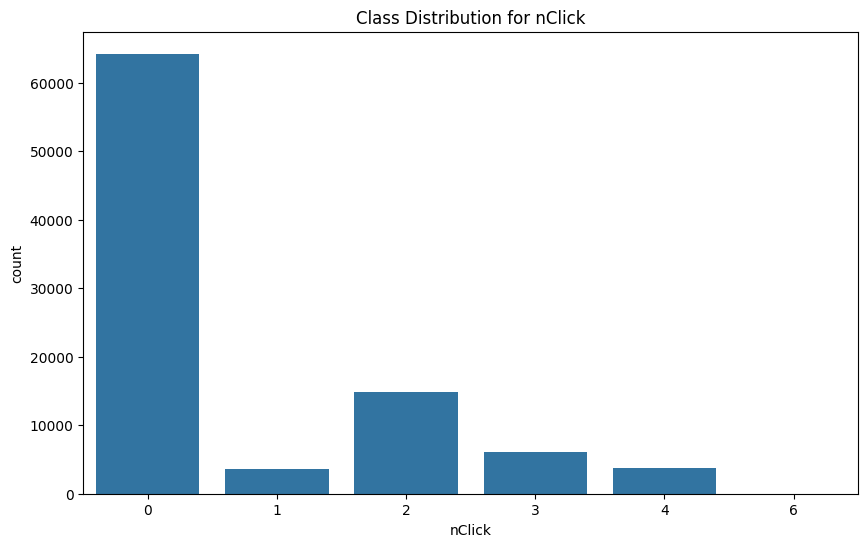

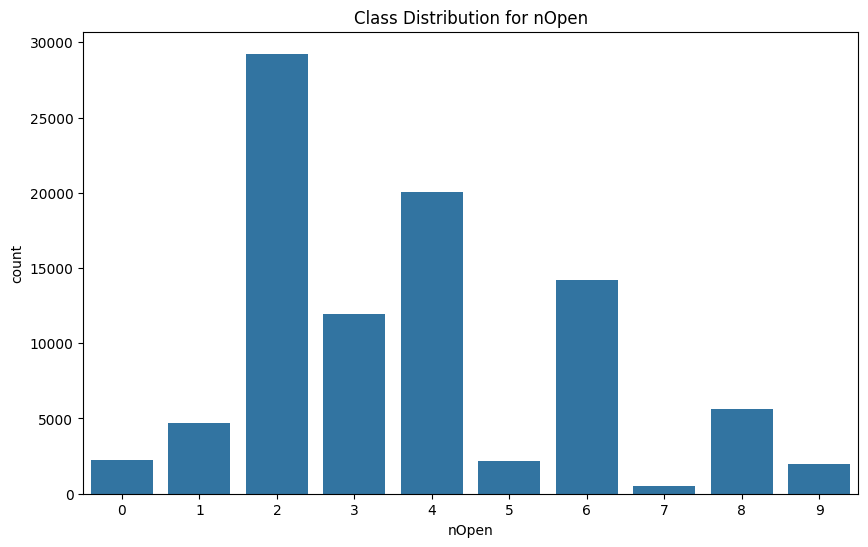

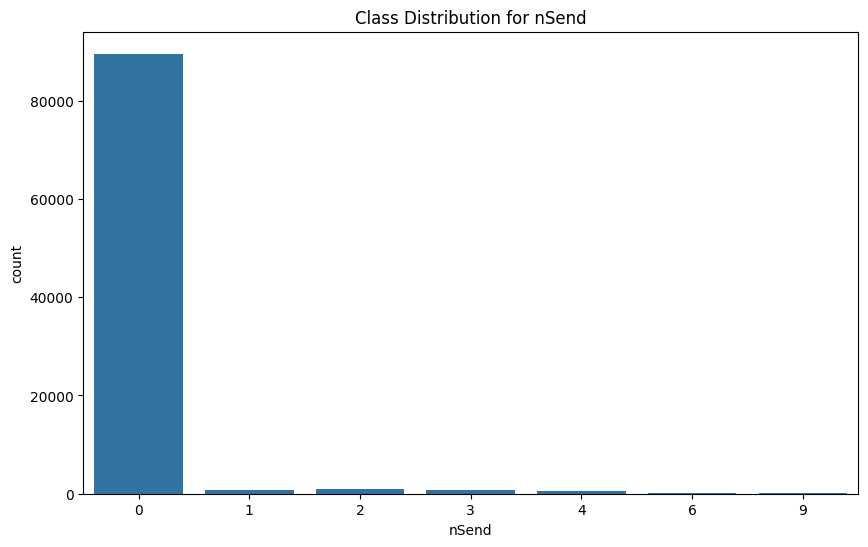

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Анализ баланса классов
def plot_class_distribution(data, target):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=target, data=data)
    plt.title(f"Class Distribution for {target}")
    plt.show()

plot_class_distribution(final_data, 'nClick')
plot_class_distribution(final_data, 'nOpen')
plot_class_distribution(final_data, 'nSend')


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Функция для балансировки классов и обучения модели
def balance_and_train(X, y, target_name):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    
    # Параметры для GridSearchCV
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

    # Инициализация модели случайного леса
    clf = RandomForestClassifier(random_state=42)

    # Инициализация GridSearchCV
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Обучение модели
    grid_search.fit(X_train, y_train)

    # Лучшая модель
    best_model = grid_search.best_estimator_

    # Прогнозирование на тестовой выборке
    y_pred = best_model.predict(X_test)

    # Оценка модели
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f"Best parameters for {target_name}: {grid_search.best_params_}")
    print(f"Classification Report for {target_name}:\n", classification_rep)
    print(f"Confusion Matrix for {target_name}:\n", confusion_mat)

    return best_model

# Признаки для модели
X = final_data.drop(columns=['UID', 'BeginDate', 'EndDate', 'nClick', 'nOpen', 'nSend'])

# Целевые признаки
targets = ['nClick', 'nOpen', 'nSend']

# Балансировка и обучение моделей для каждого таргета
models = {}
for target in targets:
    y = final_data[target]
    models[target] = balance_and_train(X, y, target)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for nClick: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report for nClick:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     12874
           1       0.91      0.95      0.93     12796
           2       0.86      0.81      0.83     12996
           3       0.91      0.92      0.91     12777
           4       0.95      0.96      0.96     12805
           6       1.00      1.00      1.00     12814

    accuracy                           0.91     77062
   macro avg       0.91      0.91      0.91     77062
weighted avg       0.91      0.91      0.91     77062

Confusion Matrix for nClick:
 [[10531   516  1109   484   233     1]
 [  284 12148   192   113    59     0]
 [ 1372   413 10495   474   241     1]
 [  437   197   328 11698   117     0]
 [  184    72   123    93 12333     0]
 [    0     0     0

# Выводы
Результаты после балансировки классов с использованием SMOTE
Цель 1: nClick
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Выводы:

Модель показывает высокую точность и полноту для всех классов.
Наиболее высокая точность и полнота наблюдаются для класса 6.
Общая точность модели составляет 91%.


Цель 2: nOpen
Лучшие параметры:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Выводы:

Модель показывает хорошие результаты для всех классов, особенно для класса 7.
Общая точность модели составляет 80%.

Цель 3: nSend
Лучшие параметры:

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Выводы:

Модель показывает отличные результаты для всех классов, особенно для классов 6 и 9.
Общая точность модели составляет 99%.

Общие рекомендации:
Улучшение модели: Достигнуты отличные результаты для всех целей, особенно после балансировки классов с использованием SMOTE. Я бы попробовал еще бустинги различные
Анализ признаков: Проведение дополнительного анализа признаков и их важности может еще больше улучшить результаты модели.
Кросс-валидация: Использование кросс-валидации показало высокую стабильность модели.